<a href="https://colab.research.google.com/github/Marshmellowon/Mnist_VAE/blob/master/1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**
Simple linear regression tutorial.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

###**Create data from linear model**

> $y = W_{true} x + b_{true} + \epsilon$

*   $x$ : input
*   $y$ : output
*   $\epsilon$: noise (normal-distribution)


In [ ]:
# Define True weight and bias
TRUE_W = 3.0
TRUE_b = 2.0

In [ ]:
# Obtain training data, Let's synthesize the training data with some noise.
NUM_DATA = 1000
x = tf.random.normal(shape=[NUM_DATA])
noise = tf.random.normal(shape=[NUM_DATA])
y = x * TRUE_W + TRUE_b + noise

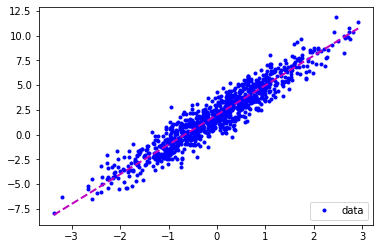

In [ ]:
# Show data
xg = np.linspace(min(x),max(x), num=100)
yg = xg * TRUE_W + TRUE_b

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, 'b.')
ax.plot(xg, yg, 'm--', linewidth=2)
plt.legend(["Data"], loc="lower right")
plt.show()

###**Set linear model to train**

> $\hat{y} = Wx + b$

$W$ and $b$ are parameters to be learned.

In [ ]:
# Define model and Loss
class Model(object):
    def __init__(self):
        self.W = tf.Variable(10.0)
        self.b = tf.Variable(-5.0)

    def __call__(self, inputs):
        return self.W * inputs + self.b

def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

In [ ]:
# Set model
model = Model()

###**Train model**

* **Method**: Gradient Descent algorithm.

* **Loss function**: Mean square error
> $l(y,x) = (y - Wx - b)^2$

In [ ]:
# Before we train the model let's visualize where the model stands right now.
# We'll plot the model's predictions in red and the training data in blue.
def plot(epoch):
    plt.scatter(x, y, c='b')
    plt.scatter(x, model(x), c='c')
    plt.title("epoch %2d, loss = %s" %(epoch, str(compute_loss(y, model(x)).numpy())))
    plt.legend(["Data", "Model"])
    plt.draw()
    plt.ion()
    plt.pause(1)
    plt.close()

=> epoch  1: w_true= 3.00, w_pred= 8.54; b_true= 2.00, b_pred= -3.58, loss= 102.28


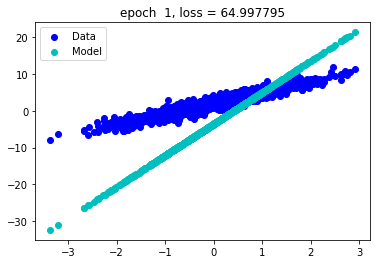

=> epoch  7: w_true= 3.00, w_pred= 4.33; b_true= 2.00, b_pred= 0.57, loss= 7.46


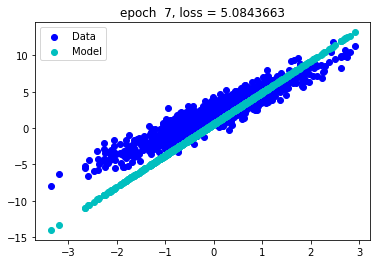

=> epoch 13: w_true= 3.00, w_pred= 3.29; b_true= 2.00, b_pred= 1.63, loss= 1.42


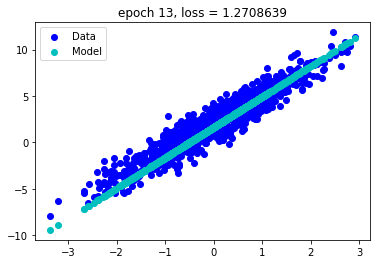

=> epoch 19: w_true= 3.00, w_pred= 3.03; b_true= 2.00, b_pred= 1.90, loss= 1.04


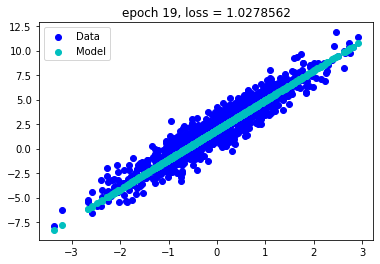

=> epoch 25: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.97, loss= 1.01


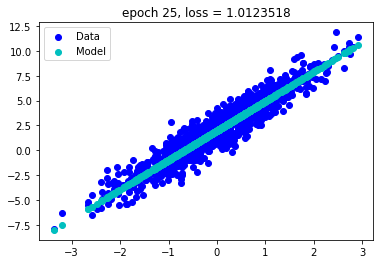

=> epoch 30: w_true= 3.00, w_pred= 2.95; b_true= 2.00, b_pred= 1.99, loss= 1.01


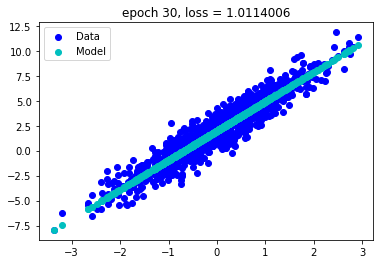

In [ ]:
# Define a training loop
learning_rate = 0.1
training_epochs = 30
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        loss = compute_loss(y, model(x))

    dW, db = tape.gradient(loss, [model.W, model.b])

    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

    if (epoch) % 6 == 0 or epoch == (training_epochs-1): 
      print("=> epoch %2d: w_true= %.2f, w_pred= %.2f; b_true= %.2f, b_pred= %.2f, loss= %.2f" %(
          epoch+1, TRUE_W, model.W.numpy(), TRUE_b, model.b.numpy(), loss.numpy()))
      plot(epoch + 1)